In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("cancer patient data sets.csv")

In [3]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

## Independent feature and Dependent features
## y - target 

In [5]:
X = data.drop(columns=['index', 'Patient Id', 'Level'])
y = data['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

## Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
scaler=StandardScaler()

## Standardizing the Data

In [8]:
X_train=scaler.fit_transform(X_train) 

In [9]:
X_test=scaler.transform(X_test)  

## Multi Linear Regression

In [10]:
regression=LinearRegression() 
regression.fit(X_train,y_train) 

LinearRegression()

## Cross Validation

In [11]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse

array([-0.07617278, -0.04217825, -0.04444576, -0.04656877, -0.05437358])

## Mean Squared Error

In [12]:
mse=-mse
np.mean(mse) 

np.float64(0.05274782928097059)

In [13]:
reg_pred=regression.predict(X_test)
reg_pred

array([ 1.00802828e+00,  9.86719003e-01,  9.10151385e-01,  2.14367708e+00,
        1.02130461e+00,  1.32451921e+00,  9.86719003e-01,  9.06034125e-01,
        1.04839216e+00,  9.92461575e-01, -6.69913998e-03,  9.38255090e-01,
        9.67577099e-01,  8.85083985e-01, -1.10034799e-01,  2.05067340e+00,
        6.33647808e-02,  2.40238830e+00,  1.97268961e+00,  1.89751945e+00,
        2.14367708e+00,  8.98483318e-01,  2.56870837e-01,  8.58659124e-01,
        1.86964046e+00,  7.31250411e-01,  8.62487505e-01,  1.96453483e+00,
        9.91478270e-02,  2.12749586e-02, -1.10034799e-01,  2.26897091e+00,
        9.80367280e-01,  1.43717730e-01,  9.52373066e-01,  1.92814650e+00,
        1.91558103e+00,  9.86849183e-01,  2.14367708e+00,  1.09746778e-01,
        2.40238830e+00,  2.41004507e+00,  1.98259396e-01,  9.35035861e-01,
        1.00802828e+00,  1.43717730e-01,  9.91478270e-02,  7.68273114e-01,
        2.40238830e+00, -8.34410087e-02,  1.09626246e+00,  1.94237155e+00,
        7.31250411e-01,  

## Calculate R² score

In [14]:

r2 = r2_score(y_test, reg_pred)

print(f"R-squared Score: {r2:.4f}")

R-squared Score: 0.9229


## Linear Regression Graph

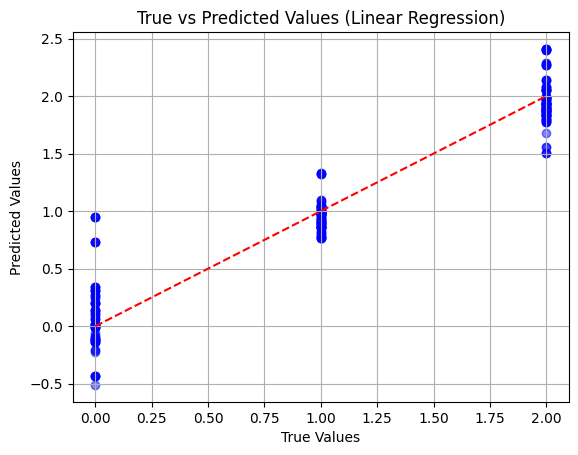

In [15]:
plt.scatter(y_test, reg_pred, color='blue', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.grid(True)
plt.show()

## Cross-Validation Score

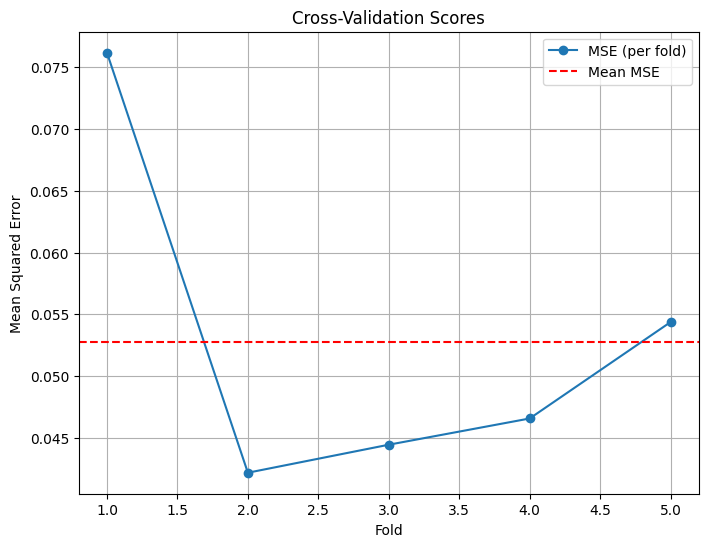

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(mse) + 1), mse, marker='o', linestyle='-', label='MSE (per fold)')
plt.axhline(y=np.mean(mse), color='r', linestyle='--', label='Mean MSE')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()